## POS tagging using modified Viterbi
<hr />

1. <B> Problem Statment </B>
 * Modify the Viterbi algorithm to solve the problem of unknown words using at least two techniques. 
    
2. <B> DataSet used </B>
 *  The Treebank dataset of NLTK with the 'universal' tagset
 *  The dataset consisis of 12 POS tags which are of  Verb, Noun, Pronouns, Adjectives, Adverbs, Adpositions, Conjunctions,     Determiners, Cardinal Numbers, Particles, Other/ Foreign words, Punctuations
 
3. <b>Goals </b>
  * Write the vanilla Viterbi algorithm for assigning POS tags
  * Solve the problem of unknown words using at least two techniques
  * Compare the tagging accuracy after making these modifications with the vanilla Viterbi
  * List down at least three cases from the sample test file (i.e. unknown word-tag pairs) which were incorrectly tagged by     the original Viterbi POS tagger and got corrected after  modifications.
 <hr />

## Approach
<hr />

I.   <b> Data Preparation and EDA </b>  
  
II.  <b> Build the vanilla Viterbi based POS tagger </b> 
      
III. <b> Modify Viterbi Heuristic Algorithm to Tag Using Rule-Based approach ( Regular Expression Technique) </b> 

IV.  <b> Modify Viterbi Heuristic Algorithm to Tag Using Probalistic approach  </b> 

V.   <b> Testing and  Evaluating the result </b>

VI.   <b> Compare the Accuracy of the Three </b> 

VII.  <b> List of cases corrected by modified Techniques </b> 

VIII. <b> Tag the words given in SampleTestSentences </b> 

<hr />

### I  Data Preparation and EDA
   * Load the dataset
   * Observe Total no of sentences in the given dataset
   * How many unique words are there in the given training dataset (which is the Vocabulary available)
   * How many unique tags are present in the given training dataset and what are they
   * What are the top most tags in the given training dataset

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import random
import time
import pprint

import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
#Programme starting time
prgStime = time.time()

In [3]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [4]:
#Type of the given data
type(nltk_data)

list

In [5]:
# Observe the data
pprint.pprint(nltk_data[:2])

[[('Pierre', 'NOUN'),
  ('Vinken', 'NOUN'),
  (',', '.'),
  ('61', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  (',', '.'),
  ('will', 'VERB'),
  ('join', 'VERB'),
  ('the', 'DET'),
  ('board', 'NOUN'),
  ('as', 'ADP'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
  ('director', 'NOUN'),
  ('Nov.', 'NOUN'),
  ('29', 'NUM'),
  ('.', '.')],
 [('Mr.', 'NOUN'),
  ('Vinken', 'NOUN'),
  ('is', 'VERB'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Elsevier', 'NOUN'),
  ('N.V.', 'NOUN'),
  (',', '.'),
  ('the', 'DET'),
  ('Dutch', 'NOUN'),
  ('publishing', 'VERB'),
  ('group', 'NOUN'),
  ('.', '.')]]


In [6]:
#Split the data into train and test for Data Modelling, considering train:test are in the ration of 95:5
train_set,test_set = train_test_split(nltk_data,test_size=0.05,random_state=1986)

In [7]:
print()
print("1. Total no of sentences in given data set \t \t {0}".format(len(nltk_data)))
print("2. Total no of sentences in splitted training data set \t {0}".format(len(train_set)))
print("3. Total no of sentences in splitted testing data set \t {0}".format(len(test_set)))


1. Total no of sentences in given data set 	 	 3914
2. Total no of sentences in splitted training data set 	 3718
3. Total no of sentences in splitted testing data set 	 196


In [8]:
# Glance at the training dataset
pprint.pprint(train_set[:20])

[[('Jamaica', 'NOUN'),
  (',', '.'),
  ('wary', 'ADJ'),
  ('of', 'ADP'),
  ('*', 'X'),
  ('upsetting', 'VERB'),
  ('its', 'PRON'),
  ('Caribbean', 'NOUN'),
  ('Basin', 'NOUN'),
  ('allies', 'NOUN'),
  (',', '.'),
  ('has', 'VERB'),
  ('apparently', 'ADV'),
  ('instructed', 'VERB'),
  ('its', 'PRON'),
  ('lobbyist', 'NOUN'),
  ('*-2', 'X'),
  ('to', 'PRT'),
  ('abandon', 'VERB'),
  ('the', 'DET'),
  ('provision', 'NOUN'),
  ('initially', 'ADV'),
  ('drafted', 'VERB'),
  ('*', 'X'),
  ('by', 'ADP'),
  ('Mr.', 'NOUN'),
  ('Gray', 'NOUN'),
  (',', '.'),
  ('but', 'CONJ'),
  ('the', 'DET'),
  ('greater', 'ADJ'),
  ('question', 'NOUN'),
  ('is', 'VERB'),
  ('whether', 'ADP'),
  ('Mr.', 'NOUN'),
  ('Inouye', 'NOUN'),
  (',', '.'),
  ('who', 'PRON'),
  ('*T*-10', 'X'),
  ('has', 'VERB'),
  ('strong', 'ADJ'),
  ('ties', 'NOUN'),
  ('to', 'PRT'),
  ('the', 'DET'),
  ('sugar', 'NOUN'),
  ('industry', 'NOUN'),
  (',', '.'),
  ('is', 'VERB'),
  ('able', 'ADJ'),
  ('*-3', 'X'),
  ('to', 'PRT'),
  ('

In [9]:
# Glance at the test dataset :
pprint.pprint(test_set[:20])

[[('In', 'ADP'),
  ('major', 'ADJ'),
  ('market', 'NOUN'),
  ('activity', 'NOUN'),
  (':', '.')],
 [('INGERSOLL-RAND', 'NOUN'),
  ('Co', 'NOUN'),
  ('.', '.'),
  ('-LRB-', '.'),
  ('Woodcliff', 'NOUN'),
  ('Lake', 'NOUN'),
  (',', '.'),
  ('N.J', 'NOUN'),
  ('.', '.'),
  ('-RRB-', '.'),
  ('--', '.')],
 [('The', 'DET'),
  ('dispute', 'NOUN'),
  ('involves', 'VERB'),
  ('Darkhorse', 'NOUN'),
  ('Productions', 'NOUN'),
  ('Inc.', 'NOUN'),
  (',', '.'),
  ('a', 'DET'),
  ('TV', 'NOUN'),
  ('production', 'NOUN'),
  ('company', 'NOUN'),
  ('in', 'ADP'),
  ('which', 'DET'),
  ('Mr.', 'NOUN'),
  ('Trudeau', 'NOUN'),
  ('is', 'VERB'),
  ('a', 'DET'),
  ('co-owner', 'NOUN'),
  ('*T*-1', 'X'),
  ('.', '.')],
 [('A', 'DET'),
  ('buffet', 'NOUN'),
  ('breakfast', 'NOUN'),
  ('was', 'VERB'),
  ('held', 'VERB'),
  ('*-1', 'X'),
  ('in', 'ADP'),
  ('the', 'DET'),
  ('museum', 'NOUN'),
  (',', '.'),
  ('where', 'ADV'),
  ('food', 'NOUN'),
  ('and', 'CONJ'),
  ('drinks', 'NOUN'),
  ('are', 'VERB'),
  (

In [10]:
# Convert the training data from sentences into (Word,Tag) tuples 
train_tagged_words = [tup for sent in train_set for tup in sent]

In [11]:
pprint.pprint(train_tagged_words[:40])

[('Jamaica', 'NOUN'),
 (',', '.'),
 ('wary', 'ADJ'),
 ('of', 'ADP'),
 ('*', 'X'),
 ('upsetting', 'VERB'),
 ('its', 'PRON'),
 ('Caribbean', 'NOUN'),
 ('Basin', 'NOUN'),
 ('allies', 'NOUN'),
 (',', '.'),
 ('has', 'VERB'),
 ('apparently', 'ADV'),
 ('instructed', 'VERB'),
 ('its', 'PRON'),
 ('lobbyist', 'NOUN'),
 ('*-2', 'X'),
 ('to', 'PRT'),
 ('abandon', 'VERB'),
 ('the', 'DET'),
 ('provision', 'NOUN'),
 ('initially', 'ADV'),
 ('drafted', 'VERB'),
 ('*', 'X'),
 ('by', 'ADP'),
 ('Mr.', 'NOUN'),
 ('Gray', 'NOUN'),
 (',', '.'),
 ('but', 'CONJ'),
 ('the', 'DET'),
 ('greater', 'ADJ'),
 ('question', 'NOUN'),
 ('is', 'VERB'),
 ('whether', 'ADP'),
 ('Mr.', 'NOUN'),
 ('Inouye', 'NOUN'),
 (',', '.'),
 ('who', 'PRON'),
 ('*T*-10', 'X'),
 ('has', 'VERB')]


In [12]:
#Total no of words in the fetched training dataset
print("4.Total no of words in the fetched training dataset \t\t {0}".format(len(train_tagged_words)))

4.Total no of words in the fetched training dataset 		 95589


In [13]:
#Extract words and tags from training data set
words = [pair[0].lower() for pair in train_tagged_words]
tags = [pair[1] for pair in train_tagged_words]

In [14]:
#Vocabulary of the training data set
V = set(words)

In [15]:
#Unique set of tags in the training data set
T = set(tags)

In [16]:
print("5. No of Unique words in the given dataset \t\t {0} ".format(len(V)))
print("6. No of Unique tags in the given dataset \t\t {0} ".format(len(T)))

5. No of Unique words in the given dataset 		 11074 
6. No of Unique tags in the given dataset 		 12 


In [17]:
# what are the top most tags in the given training dataset
tags_counter = Counter(tags)

#Finding the most common tag
print("7. Most common tags in the given training data set : \n {0}".format(tags_counter.most_common(5)))
# tags_counter.most_common(5)

7. Most common tags in the given training data set : 
 [('NOUN', 27384), ('VERB', 12880), ('.', 11096), ('ADP', 9373), ('DET', 8259)]


In [18]:
#### What causes the words to be tagged as "." (dot)
dotpair = [pair for pair in train_tagged_words if pair[1]=='.']
Counter(dotpair).most_common(10)

[((',', '.'), 4606),
 (('.', '.'), 3636),
 (('$', '.'), 687),
 (('``', '.'), 668),
 (("''", '.'), 653),
 (('--', '.'), 216),
 ((';', '.'), 156),
 ((':', '.'), 134),
 (('-RRB-', '.'), 107),
 (('-LRB-', '.'), 101)]

<hr />
Below is the function to identify  the most frequent words that appeared for the specific tag
<hr />

In [19]:
#Define a dictionary for {tag: tag_list} which contains tag and corresponding tags
tag_tag_list = {}
for tag in T:
    tag_list = [pair[0].lower() for pair in train_tagged_words if pair[1]==tag]
    tag_tag_list.update({tag:tag_list})

In [20]:
def findMostCommonWordinEachTag(tags,train_bag = train_tagged_words,top_most=5):
    for tag in tags:
        #tag_pair = [pair for pair in train_tagged_words if pair[1]==tag]
        tag_list = tag_tag_list[tag]
        counter = Counter(tag_list)
        print("_"*30+" "+str(tag)+"_"*50)
        print()
        print(counter.most_common(top_most))
        print()
        print()
        
#Calling the function        
findMostCommonWordinEachTag(list(T),10)        

______________________________ VERB__________________________________________________

[('is', 627), ('said', 594), ('are', 355), ('be', 343), ('was', 335)]


______________________________ ADJ__________________________________________________

[('new', 158), ('other', 139), ('more', 111), ('many', 98), ('last', 92)]


______________________________ ADV__________________________________________________

[("n't", 309), ('also', 158), ('not', 133), ('when', 91), ('more', 86)]


______________________________ .__________________________________________________

[(',', 4606), ('.', 3636), ('$', 687), ('``', 668), ("''", 653)]


______________________________ CONJ__________________________________________________

[('and', 1476), ('but', 294), ('or', 282), ('&', 80), ('nor', 12)]


______________________________ DET__________________________________________________

[('the', 4495), ('a', 1877), ('that', 318), ('an', 309), ('this', 214)]


______________________________ ADP__________________

### II Build the vanilla Viterbi based POS tagger
   * Find the Emission Probability of a given word
   * Find the Transition Probability of the state given the previous state and represent them using dataframe
   * Develop Viterbi heuristic to find the most probable tag sequence
   * Find the Accuary of the Vierbi Heuristic     

<b>1. Emission probabilities </b>

In [21]:
# def word_given_t(word,tag,train_bag = train_tagged_words):
#     tag_list = [pair for pair in train_bag if pair[1]==tag]
#     count_t = len(tag_list)
#     w_given_tag_list = [pair for pair in tag_list if pair[0].lower()==word.lower()]
#     count_w_given_t = len(w_given_tag_list)
#     return (count_w_given_t,count_t)

In [22]:
def word_given_t(word,tag,train_bag = train_tagged_words):
    #Fetch the taglist from tag_tag_list dictionary
    tag_list = tag_tag_list[tag]
    count_t = len(tag_list)
    
    #Apply counter for tag_list
    counter_given_t = Counter(tag_list)
    #Count the no of occurences for the given word word in 
    count_w_given_t = counter_given_t[word.lower()] 
    return (count_w_given_t,count_t)

In [23]:
word_given_t('the', 'DET')# 676 3817 2  #(4495, 8259)

(4495, 8259)

In [24]:
word_given_t('Mr.','NOUN')

(355, 27384)

 <b> 2. Transition probabilities </b>

In [25]:
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [26]:
#Apply example
t2_given_t1('NOUN','ADJ')

(4274, 6112)

Develop a 12 X 12 matrix for the transisition probabiliries

In [27]:
tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [28]:
tags_df = pd.DataFrame(tags_matrix,columns=list(T),index=list(T))
tags_df

,VERB,ADJ,ADV,.,CONJ,DET,ADP,PRT,NUM,X,NOUN,PRON
VERB,0.168168,0.066382,0.081211,0.035093,0.005512,0.132997,0.091227,0.030901,0.022593,0.219332,0.110637,0.035947
ADJ,0.011780,0.067572,0.004745,0.065445,0.016525,0.004581,0.076898,0.010798,0.021106,0.020779,0.699280,0.000491
ADV,0.347291,0.130608,0.079761,0.134596,0.007311,0.069126,0.118976,0.013293,0.031240,0.021934,0.030907,0.014955
.,0.088230,0.044881,0.051820,0.093998,0.058129,0.172855,0.091294,0.002343,0.081110,0.027397,0.221341,0.066510
CONJ,0.157407,0.117130,0.055556,0.035648,0.000000,0.119907,0.050926,0.005093,0.041204,0.008333,0.350000,0.058796
DET,0.040199,0.203536,0.013198,0.017920,0.000484,0.005691,0.009565,0.000242,0.022158,0.045526,0.637850,0.003632
ADP,0.008215,0.107009,0.013870,0.040542,0.000640,0.323482,0.017604,0.001387,0.062307,0.034674,0.321989,0.068281
PRT,0.403808,0.085030,0.010506,0.044320,0.002298,0.099475,0.021011,0.001641,0.055483,0.013460,0.244583,0.018385
NUM,0.018187,0.034287,0.002982,0.115385,0.013417,0.003280,0.033691,0.025939,0.184556,0.212582,0.354502,0.001193
X,0.202825,0.016981,0.025234,0.162673,0.010316,0.055071,0.144580,0.184415,0.002857,0.075861,0.062530,0.056658


In [29]:
#The probability for the each tag to be the start of the sentence
tags_df.loc['.', :]

VERB    0.088230
ADJ     0.044881
ADV     0.051820
.       0.093998
CONJ    0.058129
DET     0.172855
ADP     0.091294
PRT     0.002343
NUM     0.081110
X       0.027397
NOUN    0.221341
PRON    0.066510
Name: ., dtype: float32

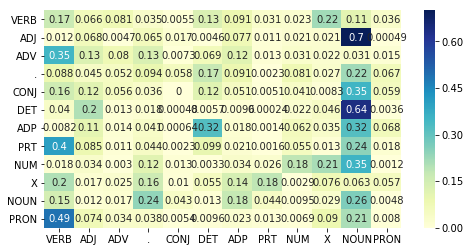

In [30]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(8, 4))
sns.heatmap(tags_df,annot=True,cmap='YlGnBu')
plt.show()

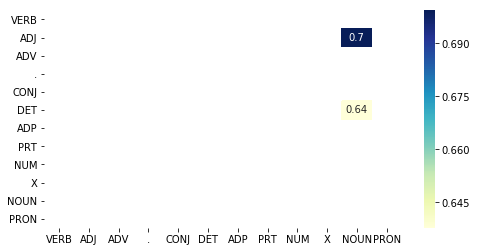

In [31]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(8, 4))
sns.heatmap(tags_frequent,annot=True,cmap='YlGnBu')
plt.show()

<b> 3. Viterbi Heuristic </b>

Let's now use the computed probabilities P(w, tag) and P(t2, t1) to assign tags to each word in the document. We'll run through each word w and compute P(tag/w)=P(w/tag).P(tag) for each tag in the tag set, and then assign the tag having the max P(tag/w).

We'll store the assigned tags in a list of tuples, similar to the list 'train_tagged_words'. Each tuple will be a (token, assigned_tag). As we progress further in the list, each tag to be assigned will use the tag of the previous token.

Note: P(tag|start) = P(tag|'.') 

In [32]:
# def Viterbi1(words, train_bag = train_tagged_words):
#     state = []
#     T = list(set([pair[1] for pair in train_bag]))
    
#     for key, word in enumerate(words):
#         #initialise list of probability column for a given observation
#         p = [] 
#         for tag in T:
#             if key == 0:
#                 transition_p = tags_df.loc['.', tag]
#             else:
#                 transition_p = tags_df.loc[state[-1], tag]
                
#             # compute emission and state probabilities
#             emission_p = word_given_t(words[key], tag)[0]/word_given_t(words[key], tag)[1]
#             state_probability = emission_p * transition_p    
#             p.append(state_probability)
            
#         pmax = max(p)
#         # getting state for which probability is maximum
#         state_max = T[p.index(pmax)] 
#         state.append(state_max)
#     return list(zip(words, state))

### III  Modified Viterbi algorithm
 Modified Viterbi algorithm to find the tag sequence for the unknown words from the training set
 
 * Added one additional parameter to the Viterbi function,which is backoff 
 * Find the unknown word by using emission probability, if emission probability is zero, which means word is unknown
 * Find the tag sequence based on the backoff algorithm, 
        if it is regex (Rule based regular expression) or 
        if it is probability based
        
 * For the regex based backoff algorithm, defined the regex patterns and called one additional function "regExTagger" which    is defined below used to tag the word based on the regex rules
 
 
 * For the probability based backoff algorithm, defined probabilisiticTagger, which assign a tag sequence to the word which    has max probability to be followed by its previous tag         

In [33]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words,backoff='off'):
    
    state = []    
    T = list(set([pair[1] for pair in train_bag]))
#     print("Tagged words {0}".format(T))
    tagstate={}
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]                
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            count_w_given_t,count_tag = word_given_t(word, tag)
            emission_p = count_w_given_t / count_tag
            
            state_probability = emission_p * transition_p            
            p.append(state_probability)
            
        pmax = max(p)        
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        
        #If the given word in unknown
        if(pmax==0):
            
            print("Unknown word => {0}".format(word))
            
            if(backoff=='regex'):                            
                state_max = regExTagger(word.lower())                
            elif(backoff=='probability'):
                if key == 0:
                    state_max = probabilisiticTagger('.')
                else :
                    state_max = probabilisiticTagger(state[-1]) 
                
        state.append(state_max)
            
    return list(zip(words, state))

####  III Modified Viterbi algorithm
<b> Modified Viterbi algorithm -First Techinique  (Rule Based regular exp) </b>

In [34]:
# specify patterns for tagging
# example from the NLTK book
patterns = [
    (r'.*ing$', 'VERB'),              # gerund
    (r'.*ed$', 'VERB'),               # past tense
    (r'.*es$', 'VERB'),               # plural verb
    (r'.*ly$', 'ADV'),
    #(r'.*ould$', 'MD'),              # modals
    #(r'.*\'s$', 'NN$'),              # possessive nouns
    (r'^\*', 'X'),                    
    (r'.*s$', 'NOUN'),                  # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'), # cardinal numbers
    (r'.*nes$', 'NOUN'),
    (r'.*ment$', 'NOUN'),
    (r'.*', 'NOUN')                    # nouns
]
def regExTagger(word):
    regexp_tagger = nltk.RegexpTagger(patterns)
    tag = regexp_tagger.tag([word])[0][1]# tag_one
    return tag

####  IV. Modified Viterbi algorithm
<b>  Modified Viterbi algorithm -Second Techinique  (Probabilistic approach) </b>

In [35]:
#Find the next tag based on the probaility of previous tag
def probabilisiticTagger(state,tags_df=tags_df):
    #find the t2_given_t1 probabilties for previous tag
    indices = pd.Index(tags_df.loc[state,])
    
    #find the max probability among the given probabiliries
    tagindex = indices.get_loc(max(tags_df.loc[state]))
    
    #find the tag name correspoding to the tagindex
    tag = list(tags_df.index)[tagindex]
    return tag

In [36]:
#Find the most possible tag sequence for tag 'ADJ'
probabilisiticTagger("ADJ")

'NOUN'

### V. Testing and  Evaluating the results

In [37]:
# ### Evaluating the results
# rndom = [random.randint(1,len(test_set)) for x in range(5)]
# test_run = [test_set[i] for i in rndom]
# test_run_base = [tup for sent in test_run for tup in sent]
# test_tagged_words = [tup[0] for sent in test_run for tup in sent]

In [38]:
#Convert all the given test_set to list of tuples
test_run_base = [tup for sent in test_set for tup in sent]
test_run_base

[('In', 'ADP'),
 ('major', 'ADJ'),
 ('market', 'NOUN'),
 ('activity', 'NOUN'),
 (':', '.'),
 ('INGERSOLL-RAND', 'NOUN'),
 ('Co', 'NOUN'),
 ('.', '.'),
 ('-LRB-', '.'),
 ('Woodcliff', 'NOUN'),
 ('Lake', 'NOUN'),
 (',', '.'),
 ('N.J', 'NOUN'),
 ('.', '.'),
 ('-RRB-', '.'),
 ('--', '.'),
 ('The', 'DET'),
 ('dispute', 'NOUN'),
 ('involves', 'VERB'),
 ('Darkhorse', 'NOUN'),
 ('Productions', 'NOUN'),
 ('Inc.', 'NOUN'),
 (',', '.'),
 ('a', 'DET'),
 ('TV', 'NOUN'),
 ('production', 'NOUN'),
 ('company', 'NOUN'),
 ('in', 'ADP'),
 ('which', 'DET'),
 ('Mr.', 'NOUN'),
 ('Trudeau', 'NOUN'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('co-owner', 'NOUN'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ('A', 'DET'),
 ('buffet', 'NOUN'),
 ('breakfast', 'NOUN'),
 ('was', 'VERB'),
 ('held', 'VERB'),
 ('*-1', 'X'),
 ('in', 'ADP'),
 ('the', 'DET'),
 ('museum', 'NOUN'),
 (',', '.'),
 ('where', 'ADV'),
 ('food', 'NOUN'),
 ('and', 'CONJ'),
 ('drinks', 'NOUN'),
 ('are', 'VERB'),
 ('banned', 'VERB'),
 ('*-2', 'X'),
 ('to', 'PRT'),
 ('ev

In [39]:
# Extract the words from the given test_set
test_tagged_words = [tup[0] for sent in test_set for tup in sent]
test_tagged_words

['In',
 'major',
 'market',
 'activity',
 ':',
 'INGERSOLL-RAND',
 'Co',
 '.',
 '-LRB-',
 'Woodcliff',
 'Lake',
 ',',
 'N.J',
 '.',
 '-RRB-',
 '--',
 'The',
 'dispute',
 'involves',
 'Darkhorse',
 'Productions',
 'Inc.',
 ',',
 'a',
 'TV',
 'production',
 'company',
 'in',
 'which',
 'Mr.',
 'Trudeau',
 'is',
 'a',
 'co-owner',
 '*T*-1',
 '.',
 'A',
 'buffet',
 'breakfast',
 'was',
 'held',
 '*-1',
 'in',
 'the',
 'museum',
 ',',
 'where',
 'food',
 'and',
 'drinks',
 'are',
 'banned',
 '*-2',
 'to',
 'everyday',
 'visitors',
 '*T*-3',
 '.',
 'A',
 'Lorillard',
 'spokewoman',
 'said',
 ',',
 '``',
 'This',
 'is',
 'an',
 'old',
 'story',
 '.',
 'Arbitrage-related',
 'trading',
 'during',
 'the',
 'session',
 'was',
 'confined',
 '*-1',
 'largely',
 'to',
 'a',
 'round',
 'of',
 'buy',
 'programs',
 'near',
 'the',
 'close',
 ',',
 'which',
 '*T*-2',
 'helped',
 '*-3',
 'offset',
 'the',
 'impact',
 'of',
 'profit-taking',
 'among',
 'blue',
 'chips',
 '.',
 'It',
 'shed',
 'about',
 '7

### Applying Viterbi Alogirthm
  *  Apply
  *  Find the accuracy
  *  Find the incorrected words

In [40]:
#Basic Viterbi Heuristic 
starttime = time.time()
tagged_seq1 = Viterbi(test_tagged_words,train_tagged_words,backoff='off')
endtime = time.time()

difference = endtime - starttime
print("Time taken in seconds: ", difference)

# Find the correctly tagged words
check1 = [(i,j) for i, j in zip(tagged_seq1, test_run_base) if i == j] 
accuracy1 = len(check1)/len(tagged_seq1)
print("accuracy of normal viterbi {0}".format(accuracy1))

incorrect_tagged_cases1 = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq1, test_run_base)) if j[0]!=j[1]]          
print()
print("Wrongly Tagged ones by normal viterbi")
pprint.pprint(incorrect_tagged_cases1)

Unknown word => INGERSOLL-RAND
Unknown word => Woodcliff
Unknown word => Productions
Unknown word => buffet
Unknown word => breakfast
Unknown word => drinks
Unknown word => everyday
Unknown word => spokewoman
Unknown word => Arbitrage-related
Unknown word => confined
Unknown word => shed
Unknown word => bolster
Unknown word => bled
Unknown word => halls
Unknown word => stabbed
Unknown word => 722
Unknown word => Circulations
Unknown word => newsweekly
Unknown word => 4,393,237
Unknown word => *T*-250
Unknown word => unpublished
Unknown word => *-156
Unknown word => lasting
Unknown word => industry-supported
Unknown word => 116.4
Unknown word => barely
Unknown word => revised
Unknown word => 116.3
Unknown word => 343
Unknown word => F.W.
Unknown word => *-162
Unknown word => biscuit
Unknown word => Lazzaroni
Unknown word => overproduction
Unknown word => Peoria
Unknown word => port
Unknown word => buffet
Unknown word => cycles
Unknown word => Theodore
Unknown word => Cooper
Unknown word

 [('a', 'DET'), (('run', 'VERB'), ('run', 'NOUN'))],
 [('*T*-2', 'X'), (('Mike', 'VERB'), ('Mike', 'NOUN'))],
 [('at', 'ADP'), (('DDB', 'VERB'), ('DDB', 'NOUN'))],
 [('Norman', 'NOUN'), (('Ricken', 'VERB'), ('Ricken', 'NOUN'))],
 [('years', 'NOUN'), (('old', 'NOUN'), ('old', 'ADJ'))],
 [('chief', 'NOUN'), (('operating', 'NOUN'), ('operating', 'VERB'))],
 [('of', 'ADP'), (('Toys', 'VERB'), ('Toys', 'NOUN'))],
 [('``', '.'), (('R', 'VERB'), ('R', 'NOUN'))],
 [("''", '.'), (('Us', 'PRON'), ('Us', 'NOUN'))],
 [('Frederick', 'NOUN'), (('Deane', 'VERB'), ('Deane', 'NOUN'))],
 [('of', 'ADP'), (('Signet', 'VERB'), ('Signet', 'NOUN'))],
 [('was', 'VERB'), (('116.9', 'VERB'), ('116.9', 'NUM'))],
 [('the', 'DET'), (('past', 'ADJ'), ('past', 'NOUN'))],
 [('of', 'ADP'), (('112.9', 'VERB'), ('112.9', 'NUM'))],
 [('of', 'ADP'), (('120.7', 'VERB'), ('120.7', 'NUM'))],
 [('in', 'ADP'), (('New', 'ADJ'), ('New', 'NOUN'))],
 [('the', 'DET'), (('past', 'ADJ'), ('past', 'NOUN'))],
 [('Peter', 'NOUN'), (('Hu

In [41]:
# Tagged sequence by original viterbi
tagged_seq1

[('In', 'ADP'),
 ('major', 'ADJ'),
 ('market', 'NOUN'),
 ('activity', 'NOUN'),
 (':', '.'),
 ('INGERSOLL-RAND', 'VERB'),
 ('Co', 'NOUN'),
 ('.', '.'),
 ('-LRB-', '.'),
 ('Woodcliff', 'VERB'),
 ('Lake', 'NOUN'),
 (',', '.'),
 ('N.J', 'NOUN'),
 ('.', '.'),
 ('-RRB-', '.'),
 ('--', '.'),
 ('The', 'DET'),
 ('dispute', 'NOUN'),
 ('involves', 'VERB'),
 ('Darkhorse', 'NOUN'),
 ('Productions', 'VERB'),
 ('Inc.', 'NOUN'),
 (',', '.'),
 ('a', 'DET'),
 ('TV', 'NOUN'),
 ('production', 'NOUN'),
 ('company', 'NOUN'),
 ('in', 'ADP'),
 ('which', 'DET'),
 ('Mr.', 'NOUN'),
 ('Trudeau', 'NOUN'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('co-owner', 'NOUN'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ('A', 'DET'),
 ('buffet', 'VERB'),
 ('breakfast', 'VERB'),
 ('was', 'VERB'),
 ('held', 'VERB'),
 ('*-1', 'X'),
 ('in', 'ADP'),
 ('the', 'DET'),
 ('museum', 'NOUN'),
 (',', '.'),
 ('where', 'ADV'),
 ('food', 'NOUN'),
 ('and', 'CONJ'),
 ('drinks', 'VERB'),
 ('are', 'VERB'),
 ('banned', 'VERB'),
 ('*-2', 'X'),
 ('to', 'PRT'),
 ('ev

## Solve the problem of unknown words

#### Applying Modified Viterbi Alogirthm (Use rulebased-regex tagger)
  *  Apply
  *  Find the accuracy
  *  Find the incorrected words

In [42]:
#Viterbi Heuristic plus regex approach
starttime = time.time()
tagged_seq2 = Viterbi(test_tagged_words,train_tagged_words,backoff='regex')
endtime = time.time()
difference = endtime - starttime
print("Time taken in seconds: ", difference)

#Find the correctly tagged words
check2 = [(i,j) for i, j in zip(tagged_seq2, test_run_base) if i == j] 
accuracy2 = len(check2)/len(tagged_seq2)
print("accuracy of modified viterbi by regex {0}".format(accuracy2))

#Wrongly tagged cases by regex
incorrect_tagged_cases2 = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq2, test_run_base)) if j[0]!=j[1]]          
print("Wrongly Tagged ones")
pprint.pprint(incorrect_tagged_cases2)

Unknown word => INGERSOLL-RAND
Unknown word => Woodcliff
Unknown word => Productions
Unknown word => buffet
Unknown word => breakfast
Unknown word => drinks
Unknown word => everyday
Unknown word => spokewoman
Unknown word => Arbitrage-related
Unknown word => confined
Unknown word => shed
Unknown word => bolster
Unknown word => bled
Unknown word => halls
Unknown word => stabbed
Unknown word => 722
Unknown word => Circulations
Unknown word => newsweekly
Unknown word => 4,393,237
Unknown word => *T*-250
Unknown word => unpublished
Unknown word => *-156
Unknown word => lasting
Unknown word => industry-supported
Unknown word => 116.4
Unknown word => barely
Unknown word => revised
Unknown word => 116.3
Unknown word => 343
Unknown word => F.W.
Unknown word => *-162
Unknown word => biscuit
Unknown word => Lazzaroni
Unknown word => overproduction
Unknown word => Peoria
Unknown word => port
Unknown word => buffet
Unknown word => cycles
Unknown word => Theodore
Unknown word => Cooper
Unknown word

In [43]:
#Tagged sequences by regex tagger
tagged_seq2

[('In', 'ADP'),
 ('major', 'ADJ'),
 ('market', 'NOUN'),
 ('activity', 'NOUN'),
 (':', '.'),
 ('INGERSOLL-RAND', 'NOUN'),
 ('Co', 'NOUN'),
 ('.', '.'),
 ('-LRB-', '.'),
 ('Woodcliff', 'NOUN'),
 ('Lake', 'NOUN'),
 (',', '.'),
 ('N.J', 'NOUN'),
 ('.', '.'),
 ('-RRB-', '.'),
 ('--', '.'),
 ('The', 'DET'),
 ('dispute', 'NOUN'),
 ('involves', 'VERB'),
 ('Darkhorse', 'NOUN'),
 ('Productions', 'NOUN'),
 ('Inc.', 'NOUN'),
 (',', '.'),
 ('a', 'DET'),
 ('TV', 'NOUN'),
 ('production', 'NOUN'),
 ('company', 'NOUN'),
 ('in', 'ADP'),
 ('which', 'DET'),
 ('Mr.', 'NOUN'),
 ('Trudeau', 'NOUN'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('co-owner', 'NOUN'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ('A', 'DET'),
 ('buffet', 'NOUN'),
 ('breakfast', 'NOUN'),
 ('was', 'VERB'),
 ('held', 'VERB'),
 ('*-1', 'X'),
 ('in', 'ADP'),
 ('the', 'DET'),
 ('museum', 'NOUN'),
 (',', '.'),
 ('where', 'ADV'),
 ('food', 'NOUN'),
 ('and', 'CONJ'),
 ('drinks', 'NOUN'),
 ('are', 'VERB'),
 ('banned', 'VERB'),
 ('*-2', 'X'),
 ('to', 'PRT'),
 ('ev


#### Applying Modified Viterbi Alogirthm (Use probabilitistic approach of previous tag tagger)
  *  Apply
  *  Find the accuracy
  *  Find the incorrected words

In [44]:
#Viterbi Heuristic plus probabilstic approach
starttime = time.time()
tagged_seq3 = Viterbi(test_tagged_words,train_tagged_words,backoff='probability')
endtime = time.time()
difference = endtime - starttime
print("Time taken in seconds: ", difference)

check3 = [(i,j) for i, j in zip(tagged_seq3, test_run_base) if i == j] 
accuracy3 = len(check3)/len(tagged_seq3)
print("accuracy for modified viterbi using probabilistic approach {0}".format(accuracy3))

#Wrongly tagged words by Probabilistic approach
incorrect_tagged_cases3 = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq3, test_run_base)) if j[0]!=j[1]]          
print("Wrongly Tagged ones")
pprint.pprint(incorrect_tagged_cases3)

Unknown word => INGERSOLL-RAND
Unknown word => Woodcliff
Unknown word => Productions
Unknown word => buffet
Unknown word => breakfast
Unknown word => drinks
Unknown word => everyday
Unknown word => spokewoman
Unknown word => Arbitrage-related
Unknown word => confined
Unknown word => shed
Unknown word => bolster
Unknown word => bled
Unknown word => halls
Unknown word => stabbed
Unknown word => 722
Unknown word => Circulations
Unknown word => newsweekly
Unknown word => 4,393,237
Unknown word => *T*-250
Unknown word => unpublished
Unknown word => *-156
Unknown word => lasting
Unknown word => industry-supported
Unknown word => 116.4
Unknown word => barely
Unknown word => revised
Unknown word => 116.3
Unknown word => 343
Unknown word => F.W.
Unknown word => *-162
Unknown word => biscuit
Unknown word => Lazzaroni
Unknown word => overproduction
Unknown word => Peoria
Unknown word => port
Unknown word => buffet
Unknown word => cycles
Unknown word => Theodore
Unknown word => Cooper
Unknown word

In [45]:
# Tagged sequences by Proabilistic approach
tagged_seq3

[('In', 'ADP'),
 ('major', 'ADJ'),
 ('market', 'NOUN'),
 ('activity', 'NOUN'),
 (':', '.'),
 ('INGERSOLL-RAND', 'NOUN'),
 ('Co', 'NOUN'),
 ('.', '.'),
 ('-LRB-', '.'),
 ('Woodcliff', 'NOUN'),
 ('Lake', 'NOUN'),
 (',', '.'),
 ('N.J', 'NOUN'),
 ('.', '.'),
 ('-RRB-', '.'),
 ('--', '.'),
 ('The', 'DET'),
 ('dispute', 'NOUN'),
 ('involves', 'VERB'),
 ('Darkhorse', 'NOUN'),
 ('Productions', 'NOUN'),
 ('Inc.', 'NOUN'),
 (',', '.'),
 ('a', 'DET'),
 ('TV', 'NOUN'),
 ('production', 'NOUN'),
 ('company', 'NOUN'),
 ('in', 'ADP'),
 ('which', 'DET'),
 ('Mr.', 'NOUN'),
 ('Trudeau', 'NOUN'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('co-owner', 'NOUN'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ('A', 'DET'),
 ('buffet', 'NOUN'),
 ('breakfast', 'NOUN'),
 ('was', 'VERB'),
 ('held', 'VERB'),
 ('*-1', 'X'),
 ('in', 'ADP'),
 ('the', 'DET'),
 ('museum', 'NOUN'),
 (',', '.'),
 ('where', 'ADV'),
 ('food', 'NOUN'),
 ('and', 'CONJ'),
 ('drinks', 'NOUN'),
 ('are', 'VERB'),
 ('banned', 'VERB'),
 ('*-2', 'X'),
 ('to', 'PRT'),
 ('ev

### VI. Compare the tagging accuracies 
<hr>

In [46]:
print("Accuracy with original Viterbi \t\t\t\t{:0.2f} %".format(accuracy1*100))
print("Accuracy with Modified Viterbi using regex \t\t{:0.2f} %".format(accuracy2*100))
print("Accuracy with Modified Viterbi using probability  \t{:0.2f} %".format(accuracy3*100))

Accuracy with original Viterbi 				91.29 %
Accuracy with Modified Viterbi using regex 		94.91 %
Accuracy with Modified Viterbi using probability  	93.10 %


### VII List of cases corrected by Modified Technique
<hr >

Create a dataframe for wrongly tagged  by one of the technique and corrected by other

In [47]:
# Create a dictionary of words which are wrongly tagged
tagged_dictionary = { j[0][0]:(j[0][1],j[1][1],j[2][1],j[3][1]) 
                     for i, j in enumerate(zip(test_run_base,tagged_seq1,tagged_seq2,tagged_seq3)) 
                         if ((j[0]!=j[1]) or (j[1]!=j[2]) or (j[2]!=j[1]))
                    }
#Created dataframe 
correctedTags = pd.DataFrame.from_dict(tagged_dictionary,orient='index')
correctedTags = correctedTags.rename(columns={0:'test_run_base',1:'Viterbi',2:'RuleBase_Regex',3:'Prbability'})
correctedTags.index.names = ['Word']

correctedTags.head(5)

,test_run_base,Viterbi,RuleBase_Regex,Prbability
Word,,,,
INGERSOLL-RAND,NOUN,VERB,NOUN,NOUN
Woodcliff,NOUN,VERB,NOUN,NOUN
Productions,NOUN,VERB,NOUN,NOUN
buffet,VERB,VERB,NOUN,VERB
breakfast,NOUN,VERB,NOUN,NOUN


 List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

####  Tags which are corrected by RuleBase_Regex

In [48]:
# First five corrected tags 
correctedTags.loc[(correctedTags['test_run_base']!=correctedTags['Viterbi']) &
                  (correctedTags['test_run_base']==correctedTags['RuleBase_Regex']) &
                  (correctedTags['test_run_base']!=correctedTags['Prbability'])
                 ].head(5)                

,test_run_base,Viterbi,RuleBase_Regex,Prbability
Word,,,,
722,NUM,VERB,NUM,NOUN
Circulations,NOUN,VERB,NOUN,DET
newsweekly,ADV,VERB,ADV,NOUN
*T*-250,X,VERB,X,VERB
116.4,NUM,VERB,NUM,X


#### Tags which are corrected by Proababilistic approach

In [49]:
correctedTags.loc[(correctedTags['test_run_base']!=correctedTags['Viterbi'] ) & 
                  (correctedTags['test_run_base']!=correctedTags['RuleBase_Regex']) &
                  (correctedTags['test_run_base']==correctedTags['Prbability'])
                 ].head(5)

,test_run_base,Viterbi,RuleBase_Regex,Prbability
Word,,,,
Palisades,NOUN,VERB,VERB,NOUN
tapes,NOUN,VERB,VERB,NOUN
Vacancies,NOUN,VERB,VERB,NOUN
Weatherly,NOUN,VERB,ADV,NOUN
bottles,NOUN,VERB,VERB,NOUN


### VIII. Tag the words given in SampleTestSentences

In [50]:
# Read the sententeces
data = pd.read_table('SampleTestSentences.txt', header = None)
print(data)

                                                    0
0   Android is a mobile operating system developed...
1   Android has been the best-selling OS worldwide...
2   Google and Twitter made a deal in 2015 that ga...
3   Twitter is an online news and social networkin...
4   Before entering politics, Donald Trump was a d...
5   The 2018 FIFA World Cup is the 21st FIFA World...
6   This is the first World Cup to be held in East...
7   Show me the cheapest round trips from Dallas t...
8   I would like to see flights from Denver to Phi...
9   Show me the price of the flights leaving Atlan...
10  NASA invited social media users to experience ...


In [51]:
#Convert to list of sentences
sentences = list(data[0])

In [52]:
#Join the sentences
sents = " ".join(sentences)
sents

"Android is a mobile operating system developed by Google. Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013. Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose. Twitter is an online news and social networking service on which users post and interact with messages known as tweets. Before entering politics, Donald Trump was a domineering businessman and a television personality. The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years. This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe. Show me the cheapest round trips from Dallas to Atlanta I would like to see flights from Denver to Philadelphia. Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco. NASA invited social media users to experience the launch of ICESAT-2 Satellite."

In [53]:
#Convert them to words for tagging
words= sents.split()
words

['Android',
 'is',
 'a',
 'mobile',
 'operating',
 'system',
 'developed',
 'by',
 'Google.',
 'Android',
 'has',
 'been',
 'the',
 'best-selling',
 'OS',
 'worldwide',
 'on',
 'smartphones',
 'since',
 '2011',
 'and',
 'on',
 'tablets',
 'since',
 '2013.',
 'Google',
 'and',
 'Twitter',
 'made',
 'a',
 'deal',
 'in',
 '2015',
 'that',
 'gave',
 'Google',
 'access',
 'to',
 "Twitter's",
 'firehose.',
 'Twitter',
 'is',
 'an',
 'online',
 'news',
 'and',
 'social',
 'networking',
 'service',
 'on',
 'which',
 'users',
 'post',
 'and',
 'interact',
 'with',
 'messages',
 'known',
 'as',
 'tweets.',
 'Before',
 'entering',
 'politics,',
 'Donald',
 'Trump',
 'was',
 'a',
 'domineering',
 'businessman',
 'and',
 'a',
 'television',
 'personality.',
 'The',
 '2018',
 'FIFA',
 'World',
 'Cup',
 'is',
 'the',
 '21st',
 'FIFA',
 'World',
 'Cup,',
 'an',
 'international',
 'football',
 'tournament',
 'contested',
 'once',
 'every',
 'four',
 'years.',
 'This',
 'is',
 'the',
 'first',
 'World',

In [54]:
sentences[0].split()

['Android',
 'is',
 'a',
 'mobile',
 'operating',
 'system',
 'developed',
 'by',
 'Google.']

In [55]:
def tagWords(words,alogrithm='off'):
    starttime = time.time()
    tagged_seq = Viterbi(words,train_tagged_words,alogrithm)
    endtime = time.time()
    difference = endtime - starttime
#     print("Time taken in seconds: ", difference)
    return tagged_seq,difference

In [56]:
# Test for one sentence
tagged_seq,timetaken = tagWords(sentences[0].split())
print("Time taken for regex approach {:.2f} sec".format(timetaken))
tagged_seq

Unknown word => Android
Unknown word => Google.
Time taken for regex approach 0.14 sec


[('Android', 'VERB'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('Google.', 'VERB')]

### Tag for all the words in sample sentences

In [57]:
tagged_seq1,timetaken1 = tagWords(words)
print("Time taken for regex approach {:.2f} sec".format(timetaken1))

Unknown word => Android
Unknown word => Google.
Unknown word => Android
Unknown word => OS
Unknown word => worldwide
Unknown word => smartphones
Unknown word => 2011
Unknown word => 2013.
Unknown word => Google
Unknown word => Twitter
Unknown word => 2015
Unknown word => Google
Unknown word => Twitter's
Unknown word => firehose.
Unknown word => Twitter
Unknown word => online
Unknown word => interact
Unknown word => messages
Unknown word => tweets.
Unknown word => politics,
Unknown word => domineering
Unknown word => personality.
Unknown word => 2018
Unknown word => FIFA
Unknown word => Cup
Unknown word => 21st
Unknown word => FIFA
Unknown word => Cup,
Unknown word => tournament
Unknown word => contested
Unknown word => years.
Unknown word => Cup
Unknown word => Europe.
Unknown word => trips
Unknown word => Philadelphia.
Unknown word => arriving
Unknown word => Francisco.
Unknown word => NASA
Unknown word => invited
Unknown word => ICESAT-2
Unknown word => Satellite.
Time taken for rege

In [58]:
tagged_seq1

[('Android', 'VERB'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('Google.', 'VERB'),
 ('Android', 'VERB'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'ADJ'),
 ('OS', 'VERB'),
 ('worldwide', 'VERB'),
 ('on', 'ADP'),
 ('smartphones', 'VERB'),
 ('since', 'ADP'),
 ('2011', 'VERB'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'NOUN'),
 ('since', 'ADP'),
 ('2013.', 'VERB'),
 ('Google', 'VERB'),
 ('and', 'CONJ'),
 ('Twitter', 'VERB'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'VERB'),
 ('that', 'DET'),
 ('gave', 'VERB'),
 ('Google', 'VERB'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ("Twitter's", 'VERB'),
 ('firehose.', 'VERB'),
 ('Twitter', 'VERB'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'VERB'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('service', 'NOUN'),
 ('on', 'ADP'),
 ('which', 'D

In [59]:
#Tag words using regex
tagged_seq2,timetaken2 = tagWords(words,'regex')
print("Time taken for regex approach {:.2f} sec".format(timetaken2))

Unknown word => Android
Unknown word => Google.
Unknown word => Android
Unknown word => OS
Unknown word => worldwide
Unknown word => smartphones
Unknown word => 2011
Unknown word => 2013.
Unknown word => Google
Unknown word => Twitter
Unknown word => 2015
Unknown word => Google
Unknown word => Twitter's
Unknown word => firehose.
Unknown word => Twitter
Unknown word => online
Unknown word => interact
Unknown word => messages
Unknown word => tweets.
Unknown word => politics,
Unknown word => domineering
Unknown word => personality.
Unknown word => 2018
Unknown word => FIFA
Unknown word => Cup
Unknown word => 21st
Unknown word => FIFA
Unknown word => Cup,
Unknown word => tournament
Unknown word => contested
Unknown word => years.
Unknown word => Cup
Unknown word => Europe.
Unknown word => trips
Unknown word => Philadelphia.
Unknown word => arriving
Unknown word => Francisco.
Unknown word => NASA
Unknown word => invited
Unknown word => ICESAT-2
Unknown word => Satellite.
Time taken for rege

In [60]:
#Display the tagged sequences
tagged_seq2

[('Android', 'NOUN'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('Google.', 'NOUN'),
 ('Android', 'NOUN'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'ADJ'),
 ('OS', 'NOUN'),
 ('worldwide', 'NOUN'),
 ('on', 'ADP'),
 ('smartphones', 'VERB'),
 ('since', 'ADP'),
 ('2011', 'NUM'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'NOUN'),
 ('since', 'ADP'),
 ('2013.', 'NOUN'),
 ('Google', 'NOUN'),
 ('and', 'CONJ'),
 ('Twitter', 'NOUN'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'NUM'),
 ('that', 'ADP'),
 ('gave', 'VERB'),
 ('Google', 'NOUN'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ("Twitter's", 'NOUN'),
 ('firehose.', 'NOUN'),
 ('Twitter', 'NOUN'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'NOUN'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('service', 'NOUN'),
 ('on', 'ADP'),
 ('which', 'DET

In [61]:
#Tag the words using probabilistic approach
tagged_seq3,timetaken3 = tagWords(words,'probability')
print("Time taken for proability approach {:.2f} sec".format(timetaken3))

Unknown word => Android
Unknown word => Google.
Unknown word => Android
Unknown word => OS
Unknown word => worldwide
Unknown word => smartphones
Unknown word => 2011
Unknown word => 2013.
Unknown word => Google
Unknown word => Twitter
Unknown word => 2015
Unknown word => Google
Unknown word => Twitter's
Unknown word => firehose.
Unknown word => Twitter
Unknown word => online
Unknown word => interact
Unknown word => messages
Unknown word => tweets.
Unknown word => politics,
Unknown word => domineering
Unknown word => personality.
Unknown word => 2018
Unknown word => FIFA
Unknown word => Cup
Unknown word => 21st
Unknown word => FIFA
Unknown word => Cup,
Unknown word => tournament
Unknown word => contested
Unknown word => years.
Unknown word => Cup
Unknown word => Europe.
Unknown word => trips
Unknown word => Philadelphia.
Unknown word => arriving
Unknown word => Francisco.
Unknown word => NASA
Unknown word => invited
Unknown word => ICESAT-2
Unknown word => Satellite.
Time taken for proa

In [62]:
#Display the tagged words
tagged_seq3

[('Android', 'NOUN'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('Google.', 'DET'),
 ('Android', 'NOUN'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'ADJ'),
 ('OS', 'NOUN'),
 ('worldwide', 'NOUN'),
 ('on', 'ADP'),
 ('smartphones', 'DET'),
 ('since', 'ADP'),
 ('2011', 'DET'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'NOUN'),
 ('since', 'ADP'),
 ('2013.', 'DET'),
 ('Google', 'NOUN'),
 ('and', 'CONJ'),
 ('Twitter', 'NOUN'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'DET'),
 ('that', 'ADP'),
 ('gave', 'VERB'),
 ('Google', 'X'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ("Twitter's", 'VERB'),
 ('firehose.', 'X'),
 ('Twitter', 'VERB'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'NOUN'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('service', 'NOUN'),
 ('on', 'ADP'),
 ('which', 'DET'),
 ('us

#### <b> Total execution time of the program </b>

In [63]:
prgEtime = time.time()
totalTime = prgEtime - prgStime
print("Total Execution Time {:.2f} sec".format(totalTime))

Total Execution Time 183.97 sec
